# Tarea 11

## Solución de ODE's I

Ejercicio 1:. Implementa el método de Euler en Julia. Debe ser de la forma metodo_euler(f,x0,t0,tf,h). No olvide que no debe de utilizar SymPy de ningún modo en este ejercicio. Naturalmente la función f es de dos variables. El output de la función debe ser return listt,listx. Otra forma quizá más inteligente de implementarlo es definir desde antes listt, y que los inputs del método sean de la forma: metodo_euler(f,x0,listt), naturalmente en listt va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
Pruebe su nuevo método resolviendo la ecuación: $$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$ con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

De acuerdo con el método de Euler, usando: $$x_{k+1}=x_k+f(x_k,t_k)h,$$ donde $x_k=x(t_k)$ y $t_k=h k.$ con  una condición inicial, la cual está dada por $x_{0}=x(t_{0})$.

In [6]:
using PyPlot

In [21]:
function metodo_euler(f,x0,t0,tf,h) #definamos la funcion del metodo de Euler
    t = t0 #condiciones inciales para x y t
    x = x0
    listt = []  #definamos para funciones en x & t  
    listx = []
    push!(listt,t)
    push!(listx,x)
    n = round((tf-t0)/h) #aplicando la formula de Euler
    for i in 1:n-1
        x += h*f(x,t)
        t += h
        push!(listt,t)
        push!(listx,x)
    end
    return listt, listx
end;

Obs.Sabemos que dada la ecuacion diferencial tiene solucion como $$x(t)=x_{0}e^{-2.5t}$$ donde $x_0$ es una constante 

In [10]:
f(x,t)=-2.5x #definemos la funcion de dos variables que se aproxime a la solución real

f (generic function with 1 method)

In [ ]:
Definamos ME la funcion del metodo de Euler para ahorro de sintaxis en las gráficas.

In [11]:
ME=metodo_euler(f,1,0,8,1)

(Any[0, 1, 2, 3, 4, 5, 6, 7], Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859])

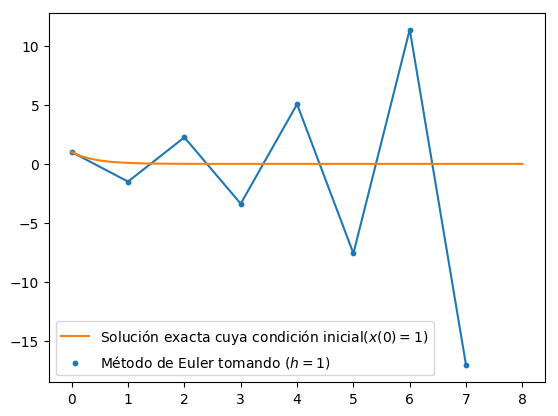

In [14]:
scatter(ME[1],ME[2],label=L"Método de Euler tomando ($h=1$)",s=10)
plot(ME[1],ME[2])
t = linspace(0,8,50)
plot(t,exp.(-2.5*t),label=L"Solución exacta cuya condición inicial($x(0)=1$)")
legend()
show();

Ahora, cambiemos h para  los cuales h=1.0,0.5,0.2,0.01

In [18]:
ME2=metodo_euler(f,1,0,8,0.5)

(Any[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5], Any[1, -0.25, 0.0625, -0.015625, 0.00390625, -0.000976563, 0.000244141, -6.10352e-5, 1.52588e-5, -3.8147e-6, 9.53674e-7, -2.38419e-7, 5.96046e-8, -1.49012e-8, 3.72529e-9, -9.31323e-10])

In [19]:
ME3=metodo_euler(f,1,0,8,0.2)

(Any[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8  …  6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8], Any[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.00195313  …  9.31323e-10, 4.65661e-10, 2.32831e-10, 1.16415e-10, 5.82077e-11, 2.91038e-11, 1.45519e-11, 7.27596e-12, 3.63798e-12, 1.81899e-12])

In [20]:
ME4=metodo_euler(f,1,0,8,0.01)]:

(Any[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  7.9, 7.91, 7.92, 7.93, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99], Any[1, 0.975, 0.950625, 0.926859, 0.903688, 0.881096, 0.859068, 0.837592, 0.816652, 0.796236  …  2.05895e-9, 2.00748e-9, 1.95729e-9, 1.90836e-9, 1.86065e-9, 1.81413e-9, 1.76878e-9, 1.72456e-9, 1.68145e-9, 1.63941e-9])

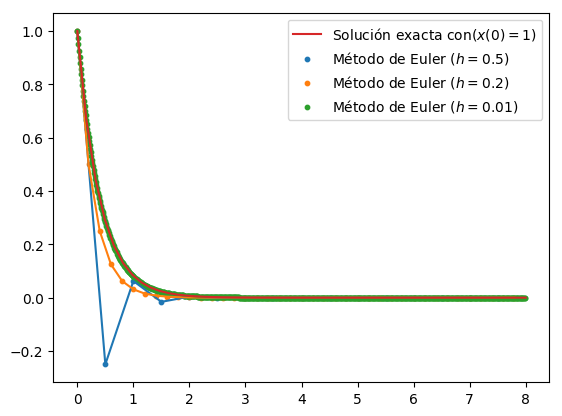

In [21]:
scatter(ME2[1],ME2[2],label=L"Método de Euler ($h=0.5$)",s=10) #Grafiquemos la relación entre la solucion general y las MEi
plot(ME2[1],ME2[2])
scatter(ME3[1],ME3[2],label=L"Método de Euler ($h=0.2$)",s=10)
plot(ME3[1],ME3[2])
scatter(ME4[1],ME4[2],label=L"Método de Euler ($h=0.01$)",s=10)
plot(ME4[1],ME4[2])
t = linspace(0,8,50)
plot(t,exp.(-2.5*t),label=L"Solución exacta con($x(0)=1$)")
legend()
show();

Ejercicio 2:. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.
A simple vista, uno podría pensar que para resolver este sistema uno debe desarrollar otro método para encontrar la solución a la ecuación diferencial del ejercicio pasado. Sin embargo, esto no es necesario.

Visto en ED de segundo orden, proponemos una solución $x(t)=e^{rt}$, por lo que la ecuación característica es:
$$r^{2}+k=0,$$
cuyas soluciones son $r=\pm i\sqrt{k}$. Por lo que la solución general es:
$$x(t)=c_{1}e^{i\sqrt{k}t}+c_{2}e^{-i\sqrt{k}t}.$$
Así cualquier solución se puede obtener como combinación lineal de las dos anteriores exponenciales (pues es una ED lineal), en particular para $c_{1}=c_{2}=\frac{1}{2}$ se tiene que:
$$x_{1}(t)=\cos\left(\sqrt{k}t\right)$$
es solución de la ecuación diferencial; para $c_{1}=-c_{2}=\frac{1}{2i}$ se concluye que:
$$x_{2}(t)=\mathrm{sen}\left(\sqrt{k}t\right)$$
también es solución, y dado que $\cos$ y $\mathrm{sen}$ son linealmente independientes, asi tomandeno las condiciones iniciales como $x(0)$ y $x'(0)$.:
$$x(t)=x(0)\cos\left(\sqrt{k}t\right)+\frac{\dot{x}(0)}{\sqrt{k}}\:\mathrm{sen}\left(\sqrt{k}t\right)$$

Ejercicio 3:. Haz $u = \dot{x}(t)$ y calcula la derivada de $u$ ¿qué obtienes y como se relaciona con el sistema original?
Si llevaste a cabo el ejercicio anterior, te darás cuenta que terminas con un sistema acoplado de ecuaciones diferenciales:
$$
\dot{u} = -kx, \dot{x} = u,
$$
Con este sistema acoplado puedes utilizar el método de Euler en su forma vectorial: $$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$ donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

Si tomamos el sistema de ED de primer como:
$$\left\{\begin{array}{ll}
\dot{x}=u,  \\
\dot{u}=-kx,  
\end{array}\right.$$
Cuyas condiciones iniciales $x_{0}=x(0)$ y $u_{0}=\dot{x}(0)$
Por lo que se puede definir una EDP: Sea $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:
$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$
con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$. Además si $\ddot{x}=f(x,\dot{x},t)$ con $x_{0}=x(t_{0})$ y $\dot{x}_{0}=\dot{x}(t_{0})$ siempre podemos hacer $u=\dot{x}$ y así $\dot{u}=f(x,u,t)$, usando el método de Euler
$$\left\{\begin{array}{ll}
x_{k+1}=x_{k}+hu_{k}, ;\\
u_{k+1}=u_{k}+hf(x_{k},u_{k},t_{k}), 
\end{array}\right.$$
Donde $x_{0}=x(t_{0}), u_{0}=\dot{x}(t_{0})$


Ejercicio 4:. Obten la solución del sistema $\ddot{x} = -kx(t)$ utilizando lo escrito arriba y el método de Euler.
Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [14]:
using PyPlot;

In [15]:
function metodo_euler2(f,x0,u0,listt)
    n = length(listt)   
    listx = zeros(n)             # lista de x_{k} del método.
    listu = zeros(n)             # lista de las u_{k}=x'_{k} 
    listx[1] = x0                # condiciones iniciales 
    listu[1] = u0                
    h = (listt[n]-listt[1])/n   #usando la formula de Euler
    for i in 1:n-1
        listx[i+1] = listx[i] + h*listu[i]                       
        listu[i+1] = listu[i] + h*f(listx[i],listu[i],listt[i])  
    end
    return listx
end;

In [16]:
f(x,u,t)=-4x #definamos la funcion, usando que  k=4, x(0)=3 y x´(0)=5

f (generic function with 1 method)

In [17]:
listt_1=0:0.2:2pi;
listt_2=0:0.1:2pi;
listt_3=0:0.01:2pi;
E1=metodo_euler2(f,3,5,listt_1)
E2=metodo_euler2(f,3,5,listt_2)
E3=metodo_euler2(f,3,5,listt_3)

629-element Array{Float64,1}:
 3.0    
 3.04992
 3.09864
 3.14615
 3.19243
 3.23744
 3.28119
 3.32364
 3.36479
 3.40461
 3.44309
 3.48021
 3.51596
 ⋮      
 2.59617
 2.6675 
 2.7378 
 2.80704
 2.87518
 2.94221
 3.00809
 3.0728 
 3.1363 
 3.19858
 3.25962
 3.31937

In [18]:
solution(t)=3*cos(2t)+(5/2)*sin(2t) #definamos la función que es la sol, vista en ejercicio 2

solution (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] solution(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[18]:1
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] 

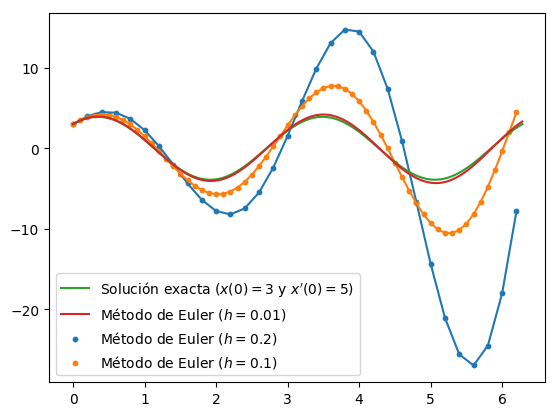

(::IJulia.##11#14)() at ./task.jl:335
while loading In[19], in expression starting on line 6


In [19]:
scatter(listt_1,E1,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listt_1,E1)
scatter(listt_2,E2,label=L"Método de Euler ($h=0.1$)",s=10)
plot(listt_2,E2)
t = linspace(0,2pi,100)
plot(t,solution(t),label=L"Solución exacta ($x(0)=3$ y $x'(0)=5$)")
plot(listt_3,E3,label=L"Método de Euler ($h=0.01$)")
legend()
show();

Ejercicio 5: Aplicar el método de Euler para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$

Con la condición inicial $x(0)=4$ apliquemos la función de Euler como

In [27]:
function metodo_euler(f,x0,listt)
    n = length(listt)            
    listx = zeros(n)             
    listx[1] = x0               
    h = (listt[n]-listt[1])/n    
    for i in 1:n-1
        listx[i+1] = listx[i] + h*f(listx[i],listt[i])   # FormulA Método de Euler.
    end
    return listx                  
end;

In [28]:
f(x,t)=(2x-18t)/(1+t)

f (generic function with 2 methods)

In [29]:
listt_4=0:0.2:3;
listt_5=0:0.1:3;
listt_6=0:0.01:3;
D1=metodo_euler(f,4,listt_4)
D2=metodo_euler(f,4,listt_5)
D3=metodo_euler(f,4,listt_6)

301-element Array{Float64,1}:
   4.0    
   4.07973
   4.15848
   4.23623
   4.31298
   4.38875
   4.46353
   4.53731
   4.6101 
   4.6819 
   4.75271
   4.82252
   4.89135
   ⋮      
 -14.0766 
 -14.282  
 -14.4884 
 -14.6958 
 -14.9042 
 -15.1135 
 -15.3238 
 -15.5352 
 -15.7475 
 -15.9607 
 -16.175  
 -16.3902 

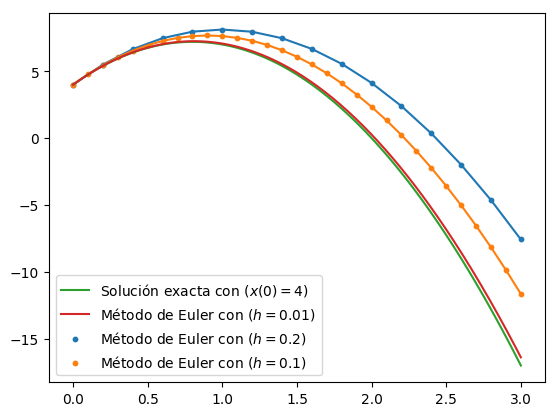

In [31]:
scatter(listt_4,D1,label=L"Método de Euler con ($h=0.2$)",s=10)
plot(listt_4,D1)
scatter(listt_5,D2,label=L"Método de Euler con ($h=0.1$)",s=10)
plot(listt_5,D2)
t = linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta con ($x(0)=4$)")
plot(listt_6,D3,label=L"Método de Euler con ($h=0.01$)")
legend()
show();